# TESLA Inc. Stock price Analysis

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import wget
import requests

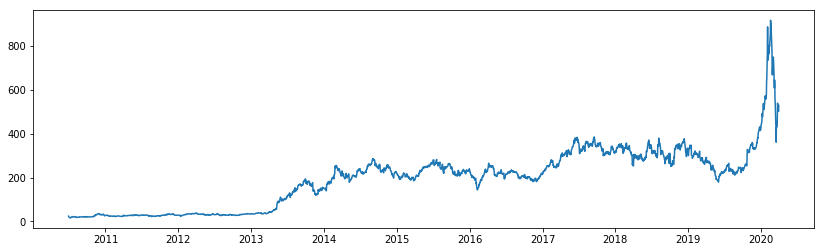

In [7]:
"""
df = pd.read_csv("data/TSLA_31032020.csv")
df.columns = ["date", "open", "high", "low", "close", "adj_close", "volume"]
df = df[1:]
df = df.iloc[::-1]
df.reset_index(inplace=True)
del df["index"]
df["date"] = pd.to_datetime(df["date"])
df.sort_values("date", inplace=True)
df.to_csv("data/tesla_processed_31032020.csv", index=False)
"""
df = pd.read_csv("data/tesla_processed_31032020.csv")
df["date"] = pd.to_datetime(df["date"])
df.sort_values("date", inplace=True)
plt.figure(figsize=(14,4))
plt.plot(df["date"], df["close"])

### Daily change

In [8]:
dfc = df.copy()

dfc["date"] = pd.to_datetime(dfc["date"])
dfc.sort_values("date", inplace=True)
dfc["year"] = dfc.apply(lambda x: x["date"].year, axis=1)
dfc = dfc[dfc["year"] >= 2013]
dfc["weekday"] = dfc.apply(lambda x: x["date"].weekday(), axis=1)

dfc.reset_index(inplace=True)
del dfc["index"]
for i in range(len(dfc)):
    if i != 0:
        current_price = dfc.iloc[i]["close"]
        previous_price = dfc.iloc[i-1]["close"]
        dfc.at[i, "change"] = (current_price - previous_price) / previous_price
dfc = dfc[1:]
##dfc["change"] = (dfc["close"] - dfc["open"]) / dfc["open"]
minChange = dfc["change"].min()
maxChange = dfc["change"].max()
dfc["nChange"] = (dfc["change"] - minChange) / (maxChange - minChange)
dfc.to_csv("data/tesla_change_daily.csv", index=False)
dfc.head(2)

,date,open,high,low,close,adj_close,volume,year,weekday,change,nChange
1,2013-01-03,35.180000,35.450001,34.750000,34.770000,34.770000,742000,2013,3,-0.016686,0.393487
2,2013-01-04,34.799999,34.799999,33.919998,34.400002,34.400002,674000,2013,4,-0.010641,0.407552


### Save year wise

In [9]:
year = 2013
while (year<=2020):
    dfy = dfc[dfc["year"]==year]
    dfy.to_csv("data/tesla_change_daily_" + str(year) + ".csv", index=False)
    year += 1

In [13]:
dfd = dfc.copy()
dfd["pchange"] = abs(dfd["change"])*100
dfd.sort_values("pchange", ascending=False)

,date,open,high,low,close,adj_close,volume,year,weekday,change,nChange,pchange
88,2013-05-09,70.120003,75.769997,63.689999,69.400002,69.400002,28605000,2013,3,0.243951,1.000000,24.395054
1783,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47233500,2020,0,0.198949,0.895278,19.894860
1812,2020-03-16,469.500000,494.869995,442.170013,445.070007,445.070007,20489500,2020,0,-0.185778,0.000000,18.577803
1815,2020-03-19,374.700012,452.000000,358.459991,427.640015,427.640015,30195500,2020,3,0.183877,0.860206,18.387690
1715,2019-10-24,298.369995,304.929993,289.200012,299.679993,299.679993,29720900,2019,3,0.176692,0.843487,17.669232
1447,2018-10-01,305.769989,311.440002,301.049988,310.700012,310.700012,21777600,2018,0,0.173471,0.835992,17.347141
1785,2020-02-05,823.260010,845.979980,704.109985,734.700012,734.700012,48423800,2020,2,-0.171758,0.032624,17.175838
232,2013-12-03,132.679993,144.940002,131.589996,144.699997,144.699997,25682400,2013,1,0.165338,0.817064,16.533784
1818,2020-03-24,477.299988,513.690002,474.000000,505.000000,505.000000,22895200,2020,1,0.162817,0.811199,16.281745
1406,2018-08-02,328.440002,349.989990,323.160004,349.540009,349.540009,23215000,2018,3,0.161880,0.809018,16.188011


In [17]:
dfd[dfd["date"]=="2020-03-06"]

,date,open,high,low,close,adj_close,volume,year,weekday,change,nChange,pchange
1806,2020-03-06,690.0,707.0,684.27002,703.47998,703.47998,12662900,2020,4,-0.029067,0.364675,2.906672


#### Weekly change

In [45]:
dfc = df.copy()

dfc["date"] = pd.to_datetime(dfc["date"])
dfc.sort_values("date", inplace=True)
dfc["year"] = dfc.apply(lambda x: x["date"].year, axis=1)
dfc = dfc[dfc["year"] >= 2013]
dfc["weekday"] = dfc.apply(lambda x: x["date"].weekday(), axis=1)

weekday = 4
#dfc = dfc[::7]
dfc = dfc[dfc["weekday"]==weekday]

dfc.reset_index(inplace=True)
del dfc["index"]
for i in range(len(dfc)):
    if i != 0:
        current_price = dfc.iloc[i]["close"]
        previous_price = dfc.iloc[i-1]["close"]
        dfc.at[i, "change"] = (current_price - previous_price) / previous_price
dfc = dfc[1:]
#dfc["change"] = (dfc["close"] - dfc["open"]) / dfc["open"]
minChange = dfc["change"].min()
maxChange = dfc["change"].max()
dfc["nChange"] = (dfc["change"] - minChange) / (maxChange - minChange)
#dfc.to_csv("../code/data/tesla_change_weekly_weekday" + str(weekday) + ".csv", index=False)
dfc.head(2)

,date,close,volume,open,high,low,year,weekday,change,nChange
1,2013-01-11,32.91,1562974.0000,34.04,34.04,32.11,2013,4,-0.043314,0.190853
2,2013-01-18,34.52,3555074.0000,34.74,34.78,33.82,2013,4,0.048921,0.356504


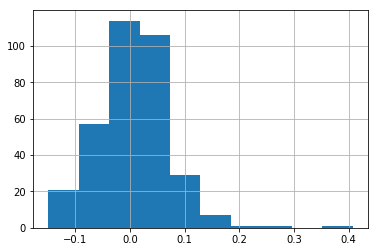

In [47]:
dfc["change"].hist()

(array([ 21.,  57., 114., 106.,  29.,   7.,   1.,   1.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

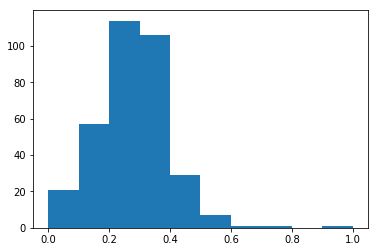

In [17]:
plt.hist(dfc["nChange"])

### Get stock data of all companies

In [80]:
def get_company_data(symbol, date_from, date_to):
    url = "https://www.worldtradingdata.com/api/v1/history?symbol="+symbol+"&date_from="+date_from+"&date_to="+date_to+"&sort=newest&api_token=QEs5LtpeTsF7xv85aMmBv5FFl0mQ9BaK3nPZ9ABns4HptPonyZTnoflQfeKy"
    r = requests.get(url)
    if "Message" not in r.json():
        dfs = pd.DataFrame(r.json())
        dfi = pd.DataFrame()
        for i in range(len(dfs)):
            dfi.at[i, "date"] = dfs.index[i]
            dfi.at[i, "close"] = dfs.iloc[i]["history"]["close"]
    else:
        dfi = pd.DataFrame(columns=["date", "close"])
    
    return dfi

In [81]:
dfc = pd.read_csv("nasdaq_companylist.csv")
num_companies = len(dfc)
dfc.head(2)

,Symbol,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9
0,YI,"111, Inc.",7.15,57089568.25,7984555.0,2018.0,Health Care,Medical/Nursing Services,https://www.nasdaq.com/symbol/yi,NaN
1,PIH,"1347 Property Insurance Holdings, Inc.",5.05,30364458.20,NaN,2014.0,Finance,Property-Casualty Insurers,https://www.nasdaq.com/symbol/pih,NaN


In [86]:
dfc[dfc["Symbol"]=="AAPL"]

,Symbol,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9
217,AAPL,Apple Inc.,200.1,9.435275e+11,NaN,1980.0,Technology,Computer Manufacturing,https://www.nasdaq.com/symbol/aapl,NaN


In [82]:
num_companies

3465

In [83]:
dfs = pd.read_csv("nasdaq_all_stock_data.csv")
dfs.head(2)

,id,symbol,name,date,close
0,1,PIH,"1347 Property Insurance Holdings, Inc.",2014-04-07,8.94
1,1,PIH,"1347 Property Insurance Holdings, Inc.",2014-04-08,8.90


In [91]:
dfs[dfs["symbol"]=="AAPL"].empty

True

In [84]:
len(dfs["symbol"].unique())

178

In [88]:
date_from="2013-04-01"
date_to="2019-03-31"
symbol = "AAPL"
dfi = get_company_data(symbol, date_from, date_to)

In [104]:
dfr = pd.DataFrame(columns=["id", "symbol", "name", "date", "close"])
dfr.to_csv("nasdaq_all_stock_data_updated.csv", index=False)

In [113]:
dfs = pd.read_csv("nasdaq_all_stock_data_updated.csv")
dfc = pd.read_csv("nasdaq_companylist.csv")
#dfc = dfc[:5]

dfm = pd.DataFrame()

for j in range(len(dfc)):
    i = dfc.index[j]
    symbol = dfc.iloc[j]["Symbol"]
    date_from="2013-04-01"
    date_to="2019-03-31"

    if dfs[dfs["symbol"]==symbol].empty:
        print("Processing company " + str(i) + "/" + str(len(dfc)) + " " + symbol)
        dfi = get_company_data(symbol, date_from, date_to)
        if len(dfi)>0:
            dfi["id"] = i
            dfi["symbol"] = symbol
            dfi["name"] = dfc.iloc[j]["Name"]
            dfi = dfi[["id", "symbol", "name", "date", "close"]]

            dfr = dfr.append(dfi)
        else:
            dfi = pd.DataFrame()
            dfi["id"] = i
            dfi["symbol"] = symbol
            dfi["name"] = dfc.iloc[j]["Name"]
            dfm = dfm.append(dfi)
            print("No stock data")

        dfr.to_csv("nasdaq_all_stock_data_updated.csv", index=False, mode="a", header=False)
        dfr = pd.DataFrame()
    else:
        print("Already processed company " + str(i) + "/" + str(len(dfc)) + " " + symbol)
        


Already processed company 0/3465 YI
Already processed company 1/3465 PIH
Already processed company 2/3465 PIHPP
Already processed company 3/3465 TURN
Already processed company 4/3465 FLWS
Already processed company 5/3465 BCOW
Already processed company 6/3465 FCCY
Already processed company 7/3465 SRCE
Already processed company 8/3465 VNET
Already processed company 9/3465 TWOU
Already processed company 10/3465 QFIN
Already processed company 11/3465 TPNL
Already processed company 12/3465 JOBS
Processing company 13/3465 JFKKU
No stock data
Already processed company 14/3465 EGHT
Already processed company 15/3465 AAON
Already processed company 16/3465 ABEO
Processing company 17/3465 ABEOW
No stock data
Already processed company 18/3465 ABIL
Already processed company 19/3465 ABMD
Already processed company 20/3465 AXAS
Already processed company 21/3465 ACIU
Already processed company 22/3465 ACIA
Already processed company 23/3465 ACTG
Already processed company 24/3465 ACHC
Already processed com

Already processed company 209/3465 ATRS
Already processed company 210/3465 APLS
Already processed company 211/3465 APOG
Already processed company 212/3465 APEN
Already processed company 213/3465 AINV
Already processed company 214/3465 AMEH
Already processed company 215/3465 APPF
Already processed company 216/3465 APPN
Already processed company 217/3465 AAPL
Already processed company 218/3465 ARCI
Already processed company 219/3465 APDN
Processing company 220/3465 APDNW
No stock data
Already processed company 221/3465 AGTC
Already processed company 222/3465 AMAT
Already processed company 223/3465 AAOI
Already processed company 224/3465 AREX
Already processed company 225/3465 APVO
Already processed company 226/3465 APTX
Already processed company 227/3465 APM
Already processed company 228/3465 APTO
Already processed company 229/3465 APYX
Already processed company 230/3465 AQMS
Already processed company 231/3465 AQB
Already processed company 232/3465 AQST
Already processed company 233/3465

Already processed company 413/3465 BMRN
Already processed company 414/3465 BMRA
Already processed company 415/3465 BNGO
Processing company 416/3465 BNGOW
No stock data
Already processed company 417/3465 BVXV
Processing company 418/3465 BVXVW
No stock data
Already processed company 419/3465 BNKL
Already processed company 420/3465 BPTH
Already processed company 421/3465 BIOS
Already processed company 422/3465 BSGM
Already processed company 423/3465 BSTC
Already processed company 424/3465 TECH
Already processed company 425/3465 BEAT
Already processed company 426/3465 BTAI
Already processed company 427/3465 BCAC
Processing company 428/3465 BCACR
No stock data
Processing company 429/3465 BCACU
No stock data
Processing company 430/3465 BCACW
No stock data
Already processed company 431/3465 BJRI
Already processed company 432/3465 BRAC
Processing company 433/3465 BRACR
No stock data
Processing company 434/3465 BRACU
No stock data
Processing company 435/3465 BRACW
No stock data
Already processe

Processing company 642/3465 CJJD
Processing company 643/3465 CLDC
Processing company 644/3465 CHNR
Processing company 645/3465 CREG
Processing company 646/3465 SXTC
Processing company 647/3465 CNTF
Processing company 648/3465 CXDC
Processing company 649/3465 CCIH
Processing company 650/3465 CNET
Processing company 651/3465 IMOS
Processing company 652/3465 CDXC
Processing company 653/3465 CHSCL
Processing company 654/3465 CHSCM
Processing company 655/3465 CHSCN
Processing company 656/3465 CHSCO
Processing company 657/3465 CHSCP
Processing company 658/3465 CHDN
Processing company 659/3465 CHUY
Processing company 660/3465 CBUS
No stock data
Processing company 661/3465 CDTX


ValueError: If using all scalar values, you must pass an index